In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat
import os
import seaborn as sns
from scipy import stats
import sys
sys.path.append('..')
from madule import simulation
from madule import plots
from statsmodels.stats.anova import AnovaRM
from scipy.io import loadmat

In [9]:
# Read original action first and color first task design to get reward schedule
dataActFirst = loadmat('/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/predefined-task-values/ExpStruct_ActFirst_winOnly.mat')  
dataClrFirst = loadmat('/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/predefined-task-values/ExpStruct_StimFirst_winOnly.mat')  

# read collected data across data
behAll = pd.read_csv('/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/originalfMRIbehFiles/AllBehData/behAll.csv')
# rearrange trial number
behAll['trialNumber'].replace(
       [44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,
        58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85],
       [2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
        30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43], inplace=True)

### Proportion of rewarded points during trials

In [12]:

# new column left rewarded 
behAll['leftRewarded'] = behAll['leftChosen']*behAll['correctChoice']
# new column yellow rewarded 
behAll['yellowRewarded'] =  behAll['yellowChosen']*behAll['correctChoice']
# new column pushed rewarded 
behAll['pushedRewarded'] =  behAll['pushed']*behAll['correctChoice']

# extract a type of value learning and reversal envirnoment
block = 'Stim'
reverse =  14
behAllCond = behAll.loc[(behAll['block']==block)&(behAll['reverse']==reverse)]

In [13]:
"""Rewarded points"""
target = 'yellowRewarded'
# Average of rewarded points Across participants for each trial
behAllCond_correctChoice = behAll.groupby(['group', 'trialNumber'], as_index=False)[target].mean()
  
# oroginal proportional of chorrect choice for each trial
correctChoice_g1 = behAllCond_correctChoice[behAllCond_correctChoice['group']==1][target]
correctChoice_g2 = behAllCond_correctChoice[behAllCond_correctChoice['group']==2][target]
correctChoice_g3 = behAllCond_correctChoice[behAllCond_correctChoice['group']==3][target]
 
# moving average over proportional of chorrect choice for each trial
correctChoice_g1_MA = []
correctChoice_g2_MA = []
correctChoice_g3_MA = []

for i in range(11):
    slice_window = correctChoice_g1.rolling(window=i+1, min_periods=1)
    correctChoice_g1_MA.append(slice_window.mean())

    slice_window = correctChoice_g2.rolling(window=i+1, min_periods=1)
    correctChoice_g2_MA.append(slice_window.mean())

    slice_window = correctChoice_g3.rolling(window=i+1, min_periods=1)
    correctChoice_g3_MA.append(slice_window.mean()) 

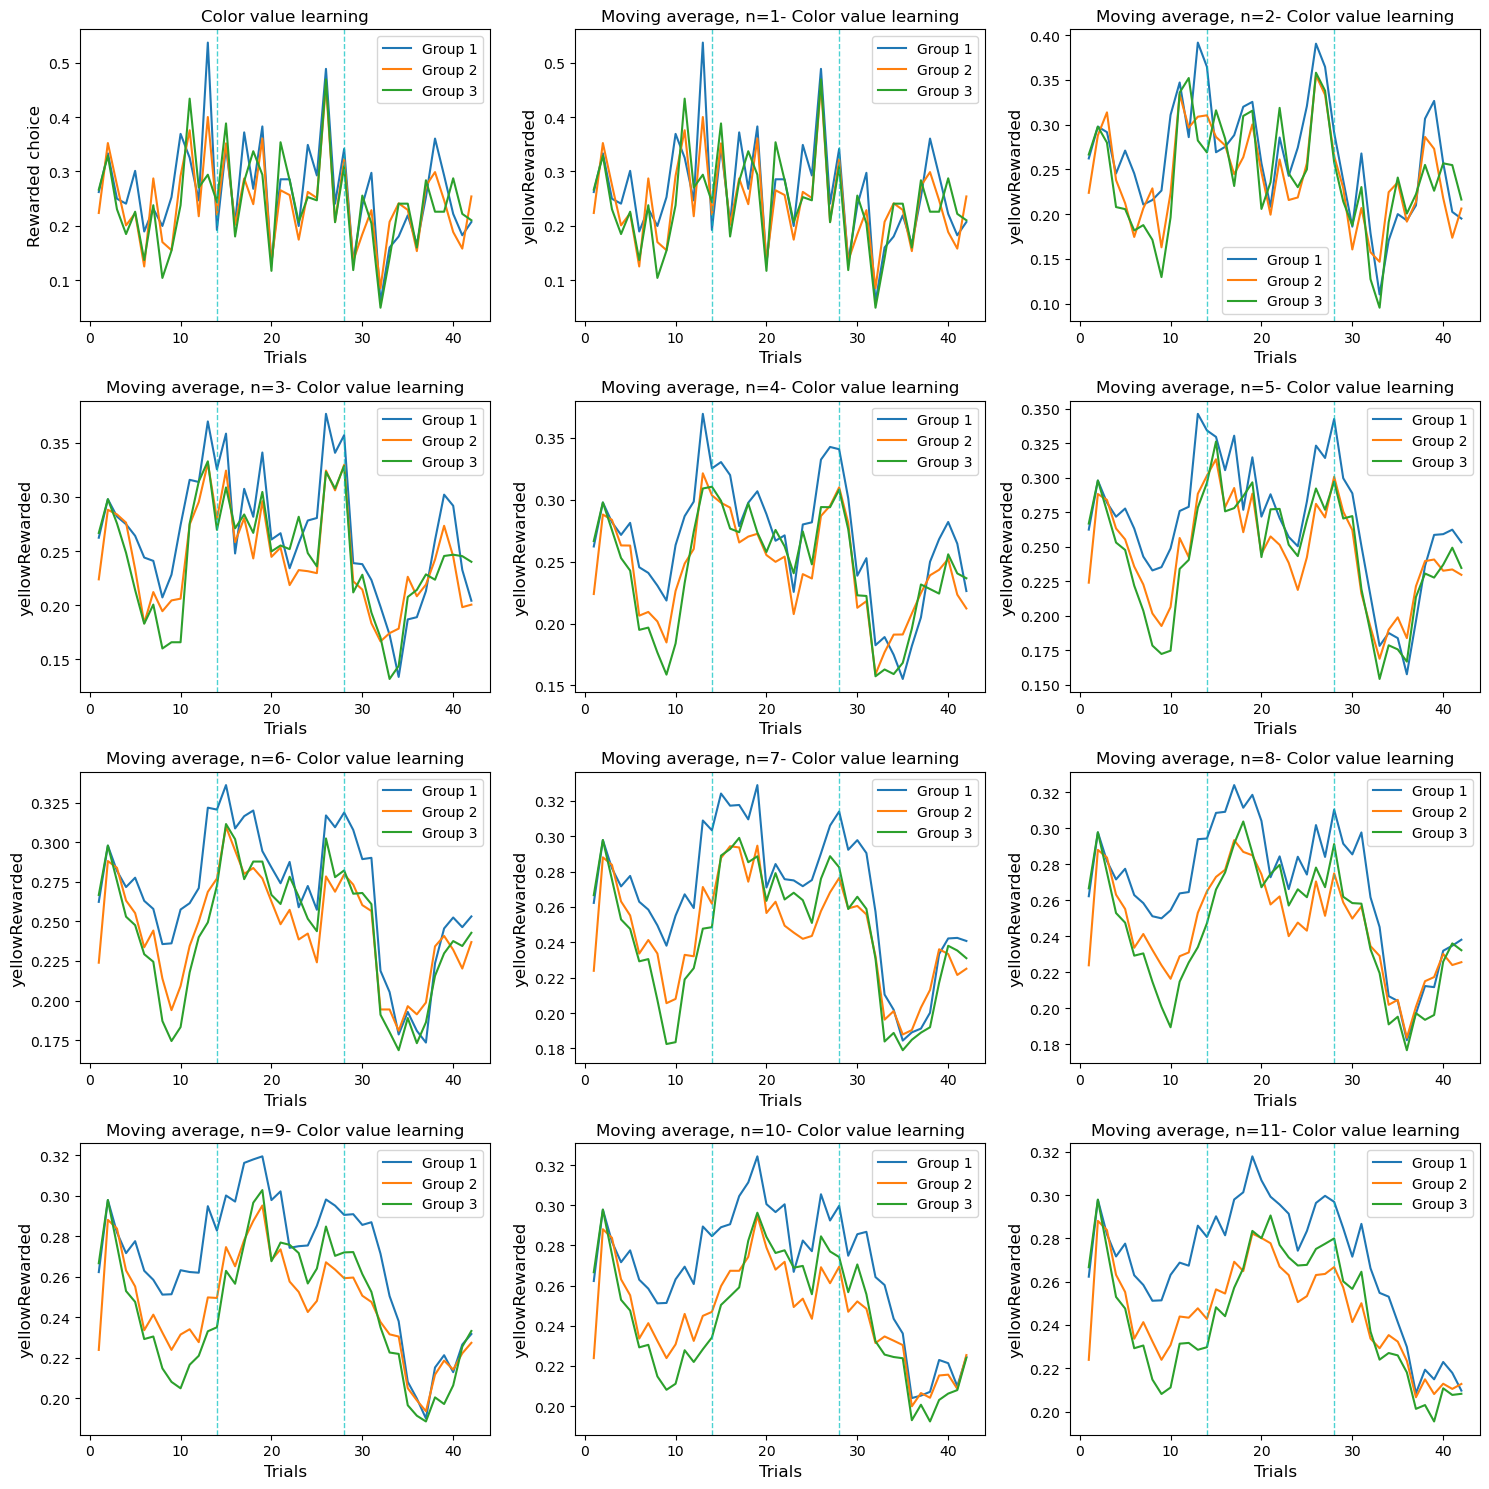

In [14]:
fig = plt.figure(figsize=(15,15), tight_layout=True)
row = 4
column = 3

"""Rewarded choice"""

# Original plot
fig.add_subplot(row, column, 1)
plt.plot(np.arange(1, 43), correctChoice_g1)
plt.plot(np.arange(1, 43), correctChoice_g2)
plt.plot(np.arange(1, 43), correctChoice_g3)
plt.xlabel('Trials', fontsize='12')
plt.ylabel('Rewarded choice', fontsize='12')
plt.legend(['Group 1', 'Group 2', 'Group 3'])
# add title
if block=='Act':
    plt.title('Action value learning')
else:
    plt.title('Color value learning')
# add reversal vertical line
if reverse==21:
    plt.axvline(x = 21, color='c', linestyle='--', linewidth=1, alpha=.7)
else:
    plt.axvline(x = 14, color='c', linestyle='--', linewidth=1, alpha=.7)
    plt.axvline(x = 28, color='c', linestyle='--', linewidth=1, alpha=.7)

# Moving average
for i in range(11):
    fig.add_subplot(row, column, 2 + i)
    plt.plot(np.arange(1, 43), correctChoice_g1_MA[i])
    plt.plot(np.arange(1, 43), correctChoice_g2_MA[i])
    plt.plot(np.arange(1, 43), correctChoice_g3_MA[i])
    plt.xlabel('Trials', fontsize='12')
    plt.ylabel(target, fontsize='12')
    plt.legend(['Group 1', 'Group 2', 'Group 3'])
    # Add titles
    if block=='Act':
        plt.title('Moving average, n=' +str(i+1) + '- Action value learning')
    else:
        plt.title('Moving average, n=' +str(i+1) + '- Color value learning')
    # add reversla vertical line
    if reverse==21:
        plt.axvline(x = 21, color='c', linestyle='--', linewidth=1, alpha=.7)
    else:
        plt.axvline(x = 14, color='c', linestyle='--', linewidth=1, alpha=.7)
        plt.axvline(x = 28, color='c', linestyle='--', linewidth=1, alpha=.7)


# Save
#plt.savefig('../figures/Choice_proportion_group_effect_' +block+ '_'+ str(reverse)+'.png', dpi=300)


### Cumulative proportion

In [6]:
"""Comulative proportion of rewarded point across trials"""


# extract a type of value learning and reversal envirnoment
block = 'Stim'
reverse =  14
behAllCond = behAll.loc[(behAll['block']==block)&(behAll['reverse']==reverse)]

target1 = 'leftRewarded'
target2 = 'leftChosen'
# rewarded yellow point
rewarded_g1_cum = []
rewarded_g2_cum = []
rewarded_g3_cum = []
for i in range(2, 44):
    rewarded_g1_cum.append(behAllCond[(behAllCond['group']==1) & (behAllCond['trialNumber']<=i)][target1].mean())
    rewarded_g2_cum.append(behAllCond[(behAllCond['group']==2) & (behAllCond['trialNumber']<=i)][target1].mean())
    rewarded_g3_cum.append(behAllCond[(behAllCond['group']==3) & (behAllCond['trialNumber']<=i)][target1].mean())

chosen_g1_cum = []
chosen_g2_cum = []
chosen_g3_cum = []
for i in range(2, 44):
    chosen_g1_cum.append(behAllCond[(behAllCond['group']==1) & (behAllCond['trialNumber']<=i)][target2].mean())
    chosen_g2_cum.append(behAllCond[(behAllCond['group']==2) & (behAllCond['trialNumber']<=i)][target2].mean())
    chosen_g3_cum.append(behAllCond[(behAllCond['group']==3) & (behAllCond['trialNumber']<=i)][target2].mean())

#lefRewarded,
# yellowRewarded,
# pushedRewarded

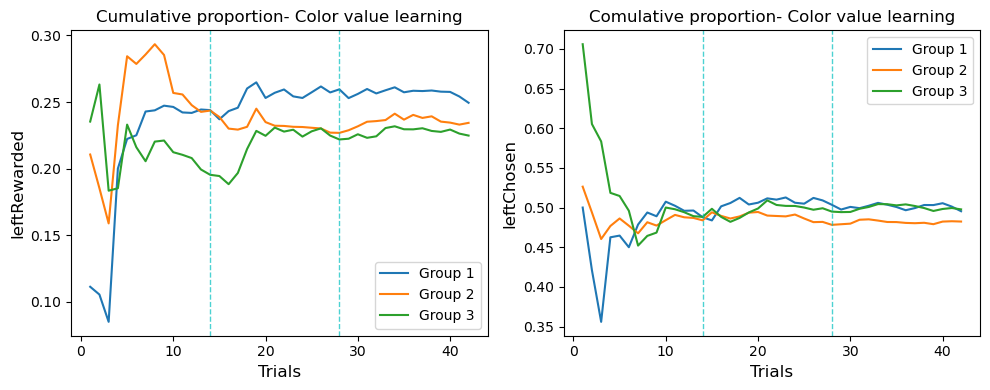

In [7]:
fig = plt.figure(figsize=(10,4), tight_layout=True)
row = 1
column = 2


"""Cumulative proportion Rewarded choice"""
# Original plot
fig.add_subplot(row, column, 1)
plt.plot(np.arange(1, len(rewarded_g1_cum)+1), rewarded_g1_cum)
plt.plot(np.arange(1, len(rewarded_g2_cum)+1), rewarded_g2_cum)
plt.plot(np.arange(1, len(rewarded_g3_cum)+1), rewarded_g3_cum)

plt.xlabel('Trials', fontsize='12')
plt.ylabel(target1, fontsize='12')
plt.legend(['Group 1', 'Group 2', 'Group 3'])
# add title
if block=='Act':
    plt.title('Cumulative proportion- Action value learning')
else:
    plt.title('Cumulative proportion- Color value learning')
# add reversla vertical line
if reverse==21:
    plt.axvline(x = 21, color='c', linestyle='--', linewidth=1, alpha=.7)
else:
    plt.axvline(x = 14, color='c', linestyle='--', linewidth=1, alpha=.7)
    plt.axvline(x = 28, color='c', linestyle='--', linewidth=1, alpha=.7)



"""Cumulative proportion chosen"""
# Original plot
fig.add_subplot(row, column, 2)
plt.plot(np.arange(1, len(chosen_g1_cum)+1), chosen_g1_cum)
plt.plot(np.arange(1, len(chosen_g2_cum)+1), chosen_g2_cum)
plt.plot(np.arange(1, len(chosen_g3_cum)+1), chosen_g3_cum)

plt.xlabel('Trials', fontsize='12')
plt.ylabel(target2, fontsize='12')
plt.legend(['Group 1', 'Group 2', 'Group 3'])
# add title
if block=='Act':
    plt.title('Comulative proportion- Action value learning')
else:
    plt.title('Comulative proportion- Color value learning')
# add reversla vertical line
if reverse==21:
    plt.axvline(x = 21, color='c', linestyle='--', linewidth=1, alpha=.7)
else:
    plt.axvline(x = 14, color='c', linestyle='--', linewidth=1, alpha=.7)
    plt.axvline(x = 28, color='c', linestyle='--', linewidth=1, alpha=.7)

# Save
#plt.savefig('../figures/Cum_choice_proportion_group_effect_' +block+ '_'+ str(reverse)+'.png', dpi=300)

    